#Introducción
En este proyecto se desarrolla un modelo de machine learning para predecir la cancelación del servicio (Churn) de clientes de TelecomX, empresa que ofrece servicios de telefonía e internet.
A partir de un conjunto de datos con información demográfica, contractual y de uso de servicios, se aplican técnicas de limpieza, transformación y modelado para identificar los factores que más influyen en la decisión de un cliente de abandonar el servicio. Se utilizan diferentes algoritmos de clasificación para evaluar cuál ofrece el mejor desempeño en la predicción.

Objetivo:
Desarrollar y evaluar modelos de machine learning que permitan predecir la cancelación de clientes en TelecomX, identificando las variables más relevantes para la toma de decisiones estratégicas.

#Desarrollo:

##Extracción del archivo tratado

In [139]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [140]:
df = pd.read_csv('datos_tratados.csv')

In [141]:
df.sample(10)

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,cuentas_Diarias
2891,4118-CEVPF,No,Female,1,No,No,35,Yes,Yes,Fiber optic,...,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),110.80,3836.30,3.693333
6479,9172-JITSM,Yes,Female,0,Yes,Yes,26,Yes,No,Fiber optic,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,90.80,2361.80,3.026667
334,0491-KAPQG,No,Male,0,No,No,21,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Electronic check,73.70,1558.70,2.456667
4448,6266-QHOJZ,No,Female,0,No,No,65,Yes,Yes,Fiber optic,...,No,Yes,No,No,One year,Yes,Electronic check,89.85,5844.65,2.995000
2953,4211-MMAZN,Yes,Male,0,No,No,1,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.25,20.25,0.675000
964,1397-XKKWR,No,Male,0,No,No,7,No,No phone service,DSL,...,Yes,No,No,No,One year,No,Mailed check,35.30,264.80,1.176667
6397,9060-HJJRW,No,Female,0,No,No,51,No,No phone service,DSL,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),56.40,2928.50,1.880000
2516,3594-KADLU,No,Male,0,Yes,No,3,No,No phone service,DSL,...,No,Yes,No,No,Month-to-month,No,Mailed check,35.10,101.10,1.170000
1865,2706-QZIHY,No,Female,0,Yes,No,15,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.20,387.90,0.840000
5602,7883-ROJOC,No,Female,0,Yes,No,19,Yes,No,DSL,...,No,No,No,No,Month-to-month,No,Mailed check,44.90,839.65,1.496667


In [142]:
df.columns

Index(['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen',
       'customer.Partner', 'customer.Dependents', 'customer.tenure',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod',
       'account.Charges.Monthly', 'account.Charges.Total', 'cuentas_Diarias'],
      dtype='object')

In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7043 non-null   object 
 1   Churn                      7043 non-null   object 
 2   customer.gender            7043 non-null   object 
 3   customer.SeniorCitizen     7043 non-null   int64  
 4   customer.Partner           7043 non-null   object 
 5   customer.Dependents        7043 non-null   object 
 6   customer.tenure            7043 non-null   int64  
 7   phone.PhoneService         7043 non-null   object 
 8   phone.MultipleLines        7043 non-null   object 
 9   internet.InternetService   7043 non-null   object 
 10  internet.OnlineSecurity    7043 non-null   object 
 11  internet.OnlineBackup      7043 non-null   object 
 12  internet.DeviceProtection  7043 non-null   object 
 13  internet.TechSupport       7043 non-null   objec

##Eliminar columnas irrelevantes

In [144]:
df = df.drop(columns=['customerID'])

###Agrupar los valores de los grupos "Internet" de "No internet service" como "No"

debido a que multiples categorías incluían los valores "No" y "No internet service" era necesario agrupar ambos en una sola categor+ia ára hacer mas robusto el modelo y reducir ruido


In [145]:
df_limpio = df.copy()

In [146]:
cols_to_fix = [
    'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection',
    'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies'
]

for col in cols_to_fix:
    df_limpio[col] = df_limpio[col].replace('No internet service', 'No')

##Encoding de las variables categóricas a un formato numérico.

In [147]:
categorical_cols = [
       'Churn', 'customer.gender', 'customer.Partner', 'customer.Dependents',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod'
]

df_encode = pd.get_dummies(df_limpio, columns=categorical_cols, drop_first=True)

df_encode

,customer.SeniorCitizen,customer.tenure,account.Charges.Monthly,account.Charges.Total,cuentas_Diarias,Churn_Yes,customer.gender_Male,customer.Partner_Yes,customer.Dependents_Yes,phone.PhoneService_Yes,...,internet.DeviceProtection_Yes,internet.TechSupport_Yes,internet.StreamingTV_Yes,internet.StreamingMovies_Yes,account.Contract_One year,account.Contract_Two year,account.PaperlessBilling_Yes,account.PaymentMethod_Credit card (automatic),account.PaymentMethod_Electronic check,account.PaymentMethod_Mailed check
0,0,9,65.60,593.30,2.186667,False,False,True,True,True,...,False,True,True,False,True,False,True,False,False,True
1,0,9,59.90,542.40,1.996667,False,True,False,False,True,...,False,False,False,True,False,False,False,False,False,True
2,0,4,73.90,280.85,2.463333,True,True,False,False,True,...,True,False,False,False,False,False,True,False,True,False
3,1,13,98.00,1237.85,3.266667,True,True,True,False,True,...,True,False,True,True,False,False,True,False,True,False
4,1,3,83.90,267.40,2.796667,True,False,True,False,True,...,False,True,True,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,13,55.15,742.90,1.838333,False,False,False,False,True,...,False,True,False,False,True,False,False,False,False,True
7039,0,22,85.10,1873.70,2.836667,True,True,True,False,True,...,False,False,False,True,False,False,True,False,True,False
7040,0,2,50.30,92.75,1.676667,False,True,False,False,True,...,False,False,False,False,False,False,True,False,False,True
7041,0,67,67.85,4627.65,2.261667,False,True,True,True,True,...,True,True,False,True,False,True,False,False,False,True


In [148]:
df_encode.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 26 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   customer.SeniorCitizen                         7043 non-null   int64  
 1   customer.tenure                                7043 non-null   int64  
 2   account.Charges.Monthly                        7043 non-null   float64
 3   account.Charges.Total                          7032 non-null   float64
 4   cuentas_Diarias                                7043 non-null   float64
 5   Churn_Yes                                      7043 non-null   bool   
 6   customer.gender_Male                           7043 non-null   bool   
 7   customer.Partner_Yes                           7043 non-null   bool   
 8   customer.Dependents_Yes                        7043 non-null   bool   
 9   phone.PhoneService_Yes                         7043 

In [149]:
df_encode.isnull().sum()

,0
customer.SeniorCitizen,0
customer.tenure,0
account.Charges.Monthly,0
account.Charges.Total,11
cuentas_Diarias,0
Churn_Yes,0
customer.gender_Male,0
customer.Partner_Yes,0
customer.Dependents_Yes,0
phone.PhoneService_Yes,0


In [150]:
df_encoded = df_encode.dropna(subset=['account.Charges.Total'])

In [151]:
df_encode.isnull().sum()

,0
customer.SeniorCitizen,0
customer.tenure,0
account.Charges.Monthly,0
account.Charges.Total,11
cuentas_Diarias,0
Churn_Yes,0
customer.gender_Male,0
customer.Partner_Yes,0
customer.Dependents_Yes,0
phone.PhoneService_Yes,0


In [152]:
from sklearn.preprocessing import MinMaxScaler

colunas_numericas = df.select_dtypes(include=['int64', 'float64']).columns
scaler = MinMaxScaler()

df[colunas_numericas] = scaler.fit_transform(df[colunas_numericas])
df.head()

,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,internet.OnlineSecurity,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,cuentas_Diarias
0,No,Female,0.0,Yes,Yes,0.125000,Yes,No,DSL,No,...,No,Yes,Yes,No,One year,Yes,Mailed check,0.471144,0.066294,0.471144
1,No,Male,0.0,No,No,0.125000,Yes,Yes,DSL,No,...,No,No,No,Yes,Month-to-month,No,Mailed check,0.414428,0.060420,0.414428
2,Yes,Male,0.0,No,No,0.055556,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,0.553731,0.030239,0.553731
3,Yes,Male,1.0,Yes,No,0.180556,Yes,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,0.793532,0.140670,0.793532
4,Yes,Female,1.0,Yes,No,0.041667,Yes,No,Fiber optic,No,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,0.653234,0.028687,0.653234


###Correlación entre las variables

In [153]:
corr = df_encode.corr()

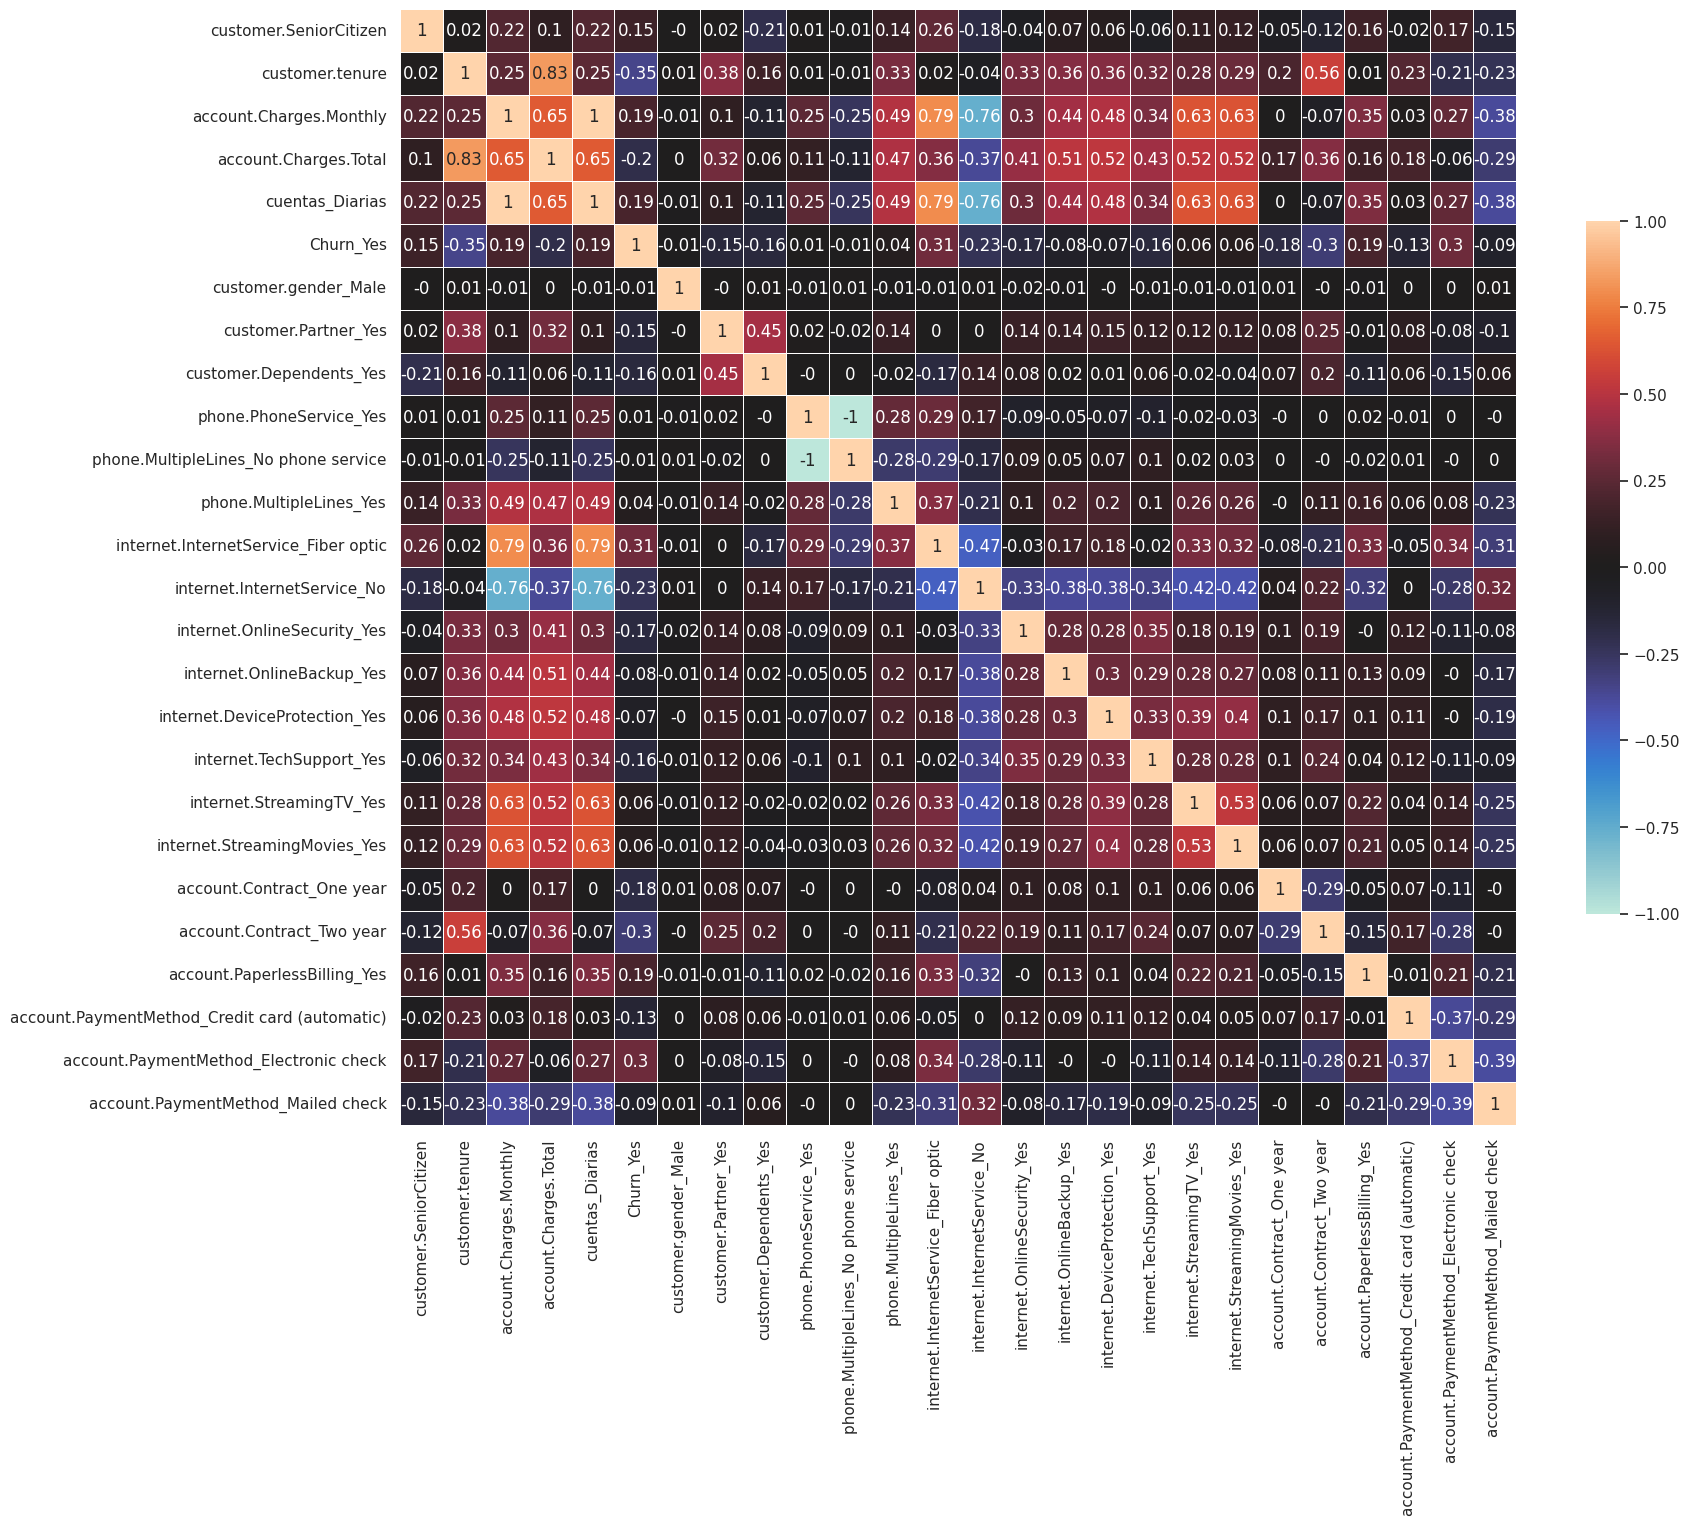

In [154]:
fig, ax = plt.subplots(figsize=(18,15))
ax = sns.heatmap(np.round(corr, 2), vmax=1, vmin=-1, center=0, square=True, linewidths=.6, annot=True, cbar_kws={"shrink": .6})
plt.show()

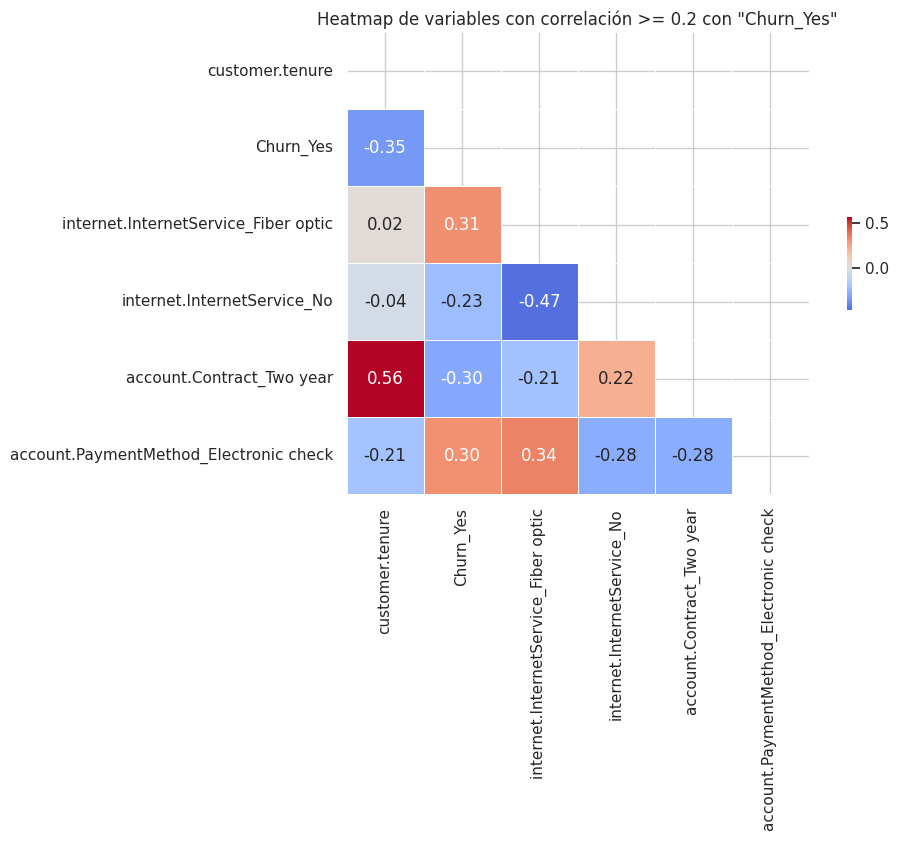

In [155]:
variable_objetivo = 'Churn_Yes'

limiar = 0.2
variables_relevantes = corr.index[abs(corr[variable_objetivo]) >= limiar].tolist()

if variable_objetivo not in variables_relevantes:
    variables_relevantes.append(variable_objetivo)

corr_filtrada = corr.loc[variables_relevantes, variables_relevantes]


mascara = np.triu(np.ones_like(corr_filtrada, dtype=bool))
plt.figure(figsize=(10,6))
sns.heatmap(
    corr_filtrada,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.2},
    mask=mascara
)

plt.title(f'Heatmap de variables con correlación >= {limiar} con "{variable_objetivo}"')
plt.show()

##Análisis dirigido

analizando como variables específicas se relacionan con la cancelación

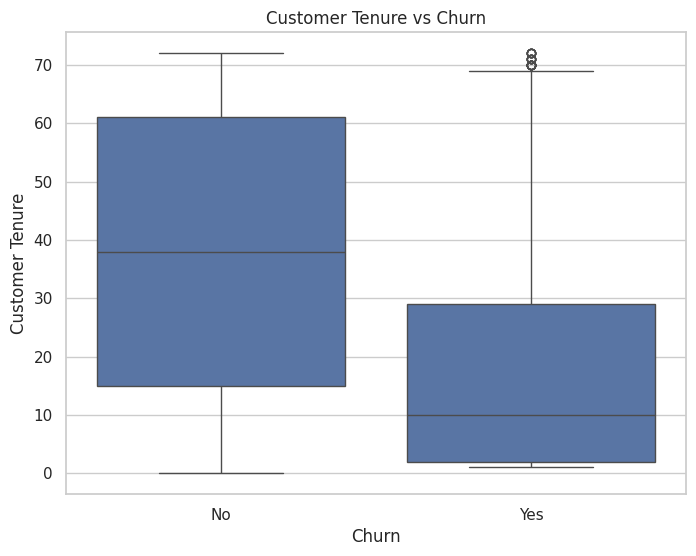

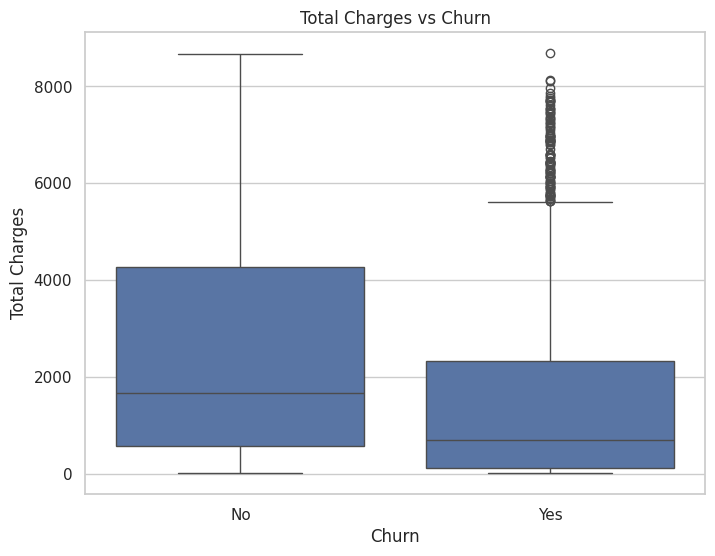

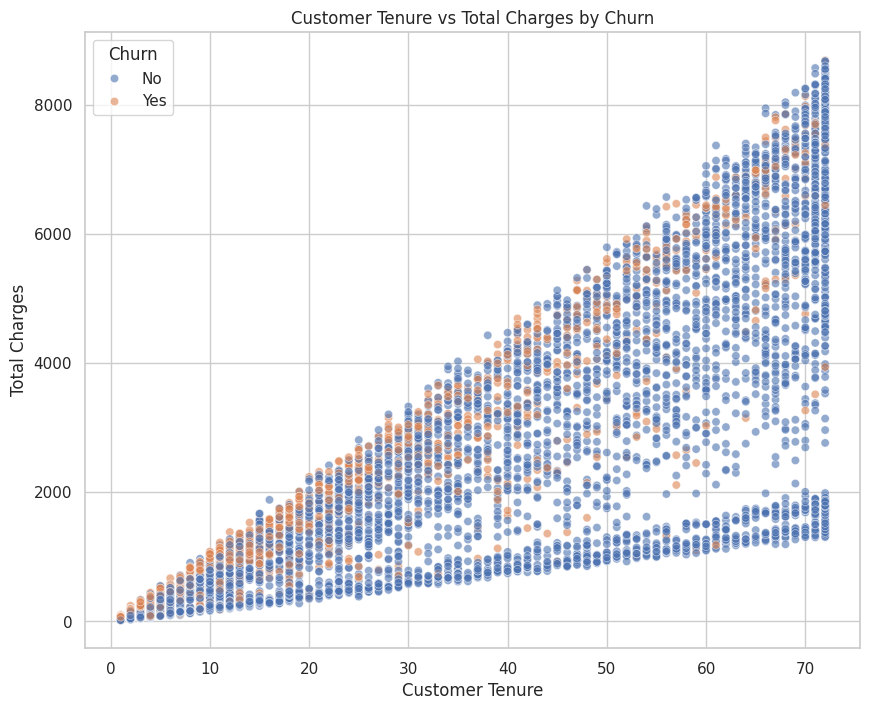

In [156]:
# Boxplot of customer.tenure vs Churn
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='customer.tenure', data=df_limpio)
plt.title('Customer Tenure vs Churn')
plt.xlabel('Churn')
plt.ylabel('Customer Tenure')
plt.show()

# Boxplot of account.Charges.Total vs Churn
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='account.Charges.Total', data=df_limpio)
plt.title('Total Charges vs Churn')
plt.xlabel('Churn')
plt.ylabel('Total Charges')
plt.show()

# Scatter plot of customer.tenure vs account.Charges.Total with Churn as hue
plt.figure(figsize=(10, 8))
sns.scatterplot(x='customer.tenure', y='account.Charges.Total', hue='Churn', data=df_limpio, alpha=0.6)
plt.title('Customer Tenure vs Total Charges by Churn')
plt.xlabel('Customer Tenure')
plt.ylabel('Total Charges')
plt.show()

###Verificar el factor de inflación de confianza para evitar la multicolinealidad

In [157]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [158]:
X = df_encoded.drop(columns=['Churn_Yes'])

In [159]:
X_const = add_constant(X)

In [160]:
X_const = X_const.astype(float)

vif_data = pd.DataFrame()
vif_data["feature"] = X_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]
display(vif_data.sort_values(by='VIF', ascending=False))

/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,feature,VIF
5,cuentas_Diarias,inf
3,account.Charges.Monthly,inf
9,phone.PhoneService_Yes,inf
10,phone.MultipleLines_No phone service,inf
12,internet.InternetService_Fiber optic,148.500814
13,internet.InternetService_No,104.213701
19,internet.StreamingMovies_Yes,24.156394
18,internet.StreamingTV_Yes,24.080019
4,account.Charges.Total,10.811490
2,customer.tenure,7.584453


In [161]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm


X_filtered = X_const.copy()
cols_to_drop = [
    "phone.PhoneService_Yes",
    "phone.MultipleLines_No phone service"
]
X_filtered.drop(columns=cols_to_drop, inplace=True)

X_filtered.drop(columns=["internet.InternetService_No"], inplace=True)

X_filtered = X_filtered.astype(float)

vif_data = pd.DataFrame()
vif_data["feature"] = X_filtered.columns
vif_data["VIF"] = [variance_inflation_factor(X_filtered.values, i) for i in range(X_filtered.shape[1])]

display(vif_data.sort_values(by="VIF", ascending=False))

/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,feature,VIF
3,account.Charges.Monthly,inf
5,cuentas_Diarias,inf
0,const,36.498367
4,account.Charges.Total,10.706800
2,customer.tenure,7.548716
10,internet.InternetService_Fiber optic,6.997820
18,account.Contract_Two year,2.532131
15,internet.StreamingTV_Yes,2.188547
16,internet.StreamingMovies_Yes,2.187888
21,account.PaymentMethod_Electronic check,1.967305


In [162]:
X_final = X_filtered.drop(columns=["account.Charges.Total"])

In [163]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data_final = pd.DataFrame()
vif_data_final["feature"] = X_final.columns
vif_data_final["VIF"] = [variance_inflation_factor(X_final.values, i) for i in range(X_final.shape[1])]

display(vif_data_final.sort_values(by="VIF", ascending=False))

/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,feature,VIF
4,cuentas_Diarias,inf
3,account.Charges.Monthly,inf
0,const,29.602764
9,internet.InternetService_Fiber optic,6.936112
2,customer.tenure,2.826197
17,account.Contract_Two year,2.521228
14,internet.StreamingTV_Yes,2.166619
15,internet.StreamingMovies_Yes,2.163842
20,account.PaymentMethod_Electronic check,1.964004
21,account.PaymentMethod_Mailed check,1.825717


##Separación de Datos

In [164]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [165]:

X = df_encoded.drop(columns=['Churn_Yes'])
y = df_encoded['Churn_Yes']

In [166]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

In [167]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

###Ejecutando SMOTE para balancear los datos

In [168]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_scaled, y_train)

##Creación de modelos

In [169]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

In [170]:
lr = LogisticRegression(random_state=42)
lr.fit(X_train_bal, y_train_bal)

# Predicciones
y_pred_lr = lr.predict(X_test_scaled)
y_prob_lr = lr.predict_proba(X_test_scaled)[:, 1]



In [171]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_bal, y_train_bal)

# Predicciones
y_pred_rf = rf.predict(X_test_scaled)
y_prob_rf = rf.predict_proba(X_test_scaled)[:, 1]




In [172]:
#modelo de predicción KNN
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train_bal, y_train_bal)

# Predicciones
y_pred_knn = knn.predict(X_test_scaled)

In [173]:
#modelo de predicción SVM
from sklearn.svm import SVC

svm = SVC(probability=True)
svm.fit(X_train_bal, y_train_bal)

# Predicciones
y_pred_svm = svm.predict(X_test_scaled)

In [174]:
#modelo Gaussiano
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train_bal, y_train_bal)

# Predicciones
y_pred_nb = nb.predict(X_test_scaled)

##Evaluación de modelos

In [175]:
#evaluación del modelo de regresión
print("Regresión Logística")
print("Exactitud:", accuracy_score(y_test, y_pred_lr))
print("ROC AUC:", roc_auc_score(y_test, y_prob_lr))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Regresión Logística
Exactitud: 0.7502369668246446
ROC AUC: 0.8454767551718145
Matriz de Confusión:
 [[1129  420]
 [ 107  454]]
              precision    recall  f1-score   support

       False       0.91      0.73      0.81      1549
        True       0.52      0.81      0.63       561

    accuracy                           0.75      2110
   macro avg       0.72      0.77      0.72      2110
weighted avg       0.81      0.75      0.76      2110



In [176]:
#evaluación del modelo random forest
print("Random Forest")
print("Exactitud:", accuracy_score(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, y_prob_rf))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest
Exactitud: 0.771090047393365
ROC AUC: 0.8195776931583714
Matriz de Confusión:
 [[1294  255]
 [ 228  333]]
              precision    recall  f1-score   support

       False       0.85      0.84      0.84      1549
        True       0.57      0.59      0.58       561

    accuracy                           0.77      2110
   macro avg       0.71      0.71      0.71      2110
weighted avg       0.77      0.77      0.77      2110



In [177]:
#evaluación del modelo KNN
print("KNN")
print("Exactitud:", accuracy_score(y_test, y_pred_knn))
print("ROC AUC:", roc_auc_score(y_test, y_pred_knn))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

KNN
Exactitud: 0.6957345971563981
ROC AUC: 0.7040871633587997
Matriz de Confusión:
 [[1063  486]
 [ 156  405]]
              precision    recall  f1-score   support

       False       0.87      0.69      0.77      1549
        True       0.45      0.72      0.56       561

    accuracy                           0.70      2110
   macro avg       0.66      0.70      0.66      2110
weighted avg       0.76      0.70      0.71      2110



In [178]:
#evaluación del modelo SVM
print("SVM")
print("Exactitud:", accuracy_score(y_test, y_pred_svm))
print("ROC AUC:", roc_auc_score(y_test, y_pred_svm))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

SVM
Exactitud: 0.7540284360189573
ROC AUC: 0.7426532441722506
Matriz de Confusión:
 [[1188  361]
 [ 158  403]]
              precision    recall  f1-score   support

       False       0.88      0.77      0.82      1549
        True       0.53      0.72      0.61       561

    accuracy                           0.75      2110
   macro avg       0.71      0.74      0.71      2110
weighted avg       0.79      0.75      0.76      2110



In [179]:
#evaluación del modelo Gaussiano
print("Gaussiano")
print("Exactitud:", accuracy_score(y_test, y_pred_nb))
print("ROC AUC:", roc_auc_score(y_test, y_pred_nb))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))

Gaussiano
Exactitud: 0.7308056872037915
ROC AUC: 0.7529865165151688
Matriz de Confusión:
 [[1093  456]
 [ 112  449]]
              precision    recall  f1-score   support

       False       0.91      0.71      0.79      1549
        True       0.50      0.80      0.61       561

    accuracy                           0.73      2110
   macro avg       0.70      0.75      0.70      2110
weighted avg       0.80      0.73      0.75      2110



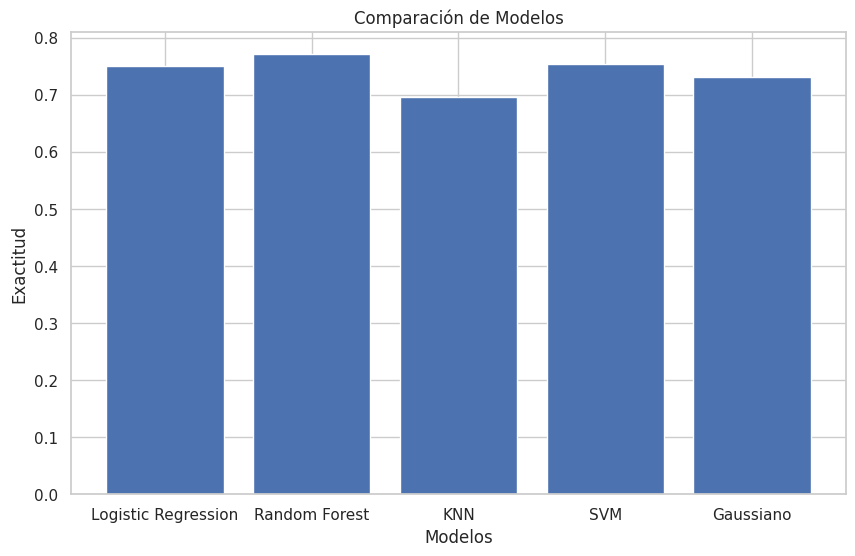

In [180]:
#gráfico de comparación de modelos Gaussiano, SVM, KNN, random forest y de regresión logística
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
models = ['Logistic Regression', 'Random Forest', 'KNN', 'SVM', 'Gaussiano']
accuracies = [accuracy_score(y_test, y_pred_lr), accuracy_score(y_test, y_pred_rf), accuracy_score(y_test, y_pred_knn), accuracy_score(y_test, y_pred_svm), accuracy_score(y_test, y_pred_nb)]
plt.bar(models, accuracies)
plt.xlabel('Modelos')
plt.ylabel('Exactitud')
plt.title('Comparación de Modelos')
plt.show()

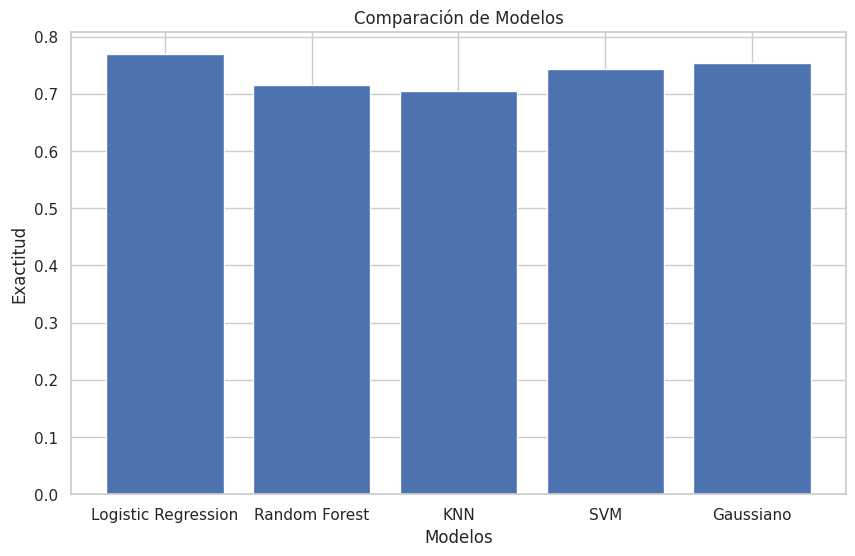

In [181]:
#gráfico de comparación de modelos Gaussiano, SVM, KNN, random forest y de regresión logística
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
models = ['Logistic Regression', 'Random Forest', 'KNN', 'SVM', 'Gaussiano']
accuracies = [roc_auc_score(y_test, y_pred_lr), roc_auc_score(y_test, y_pred_rf), roc_auc_score(y_test, y_pred_knn), roc_auc_score(y_test, y_pred_svm), roc_auc_score(y_test, y_pred_nb)]
plt.bar(models, accuracies)
plt.xlabel('Modelos')
plt.ylabel('Exactitud')
plt.title('Comparación de Modelos')
plt.show()



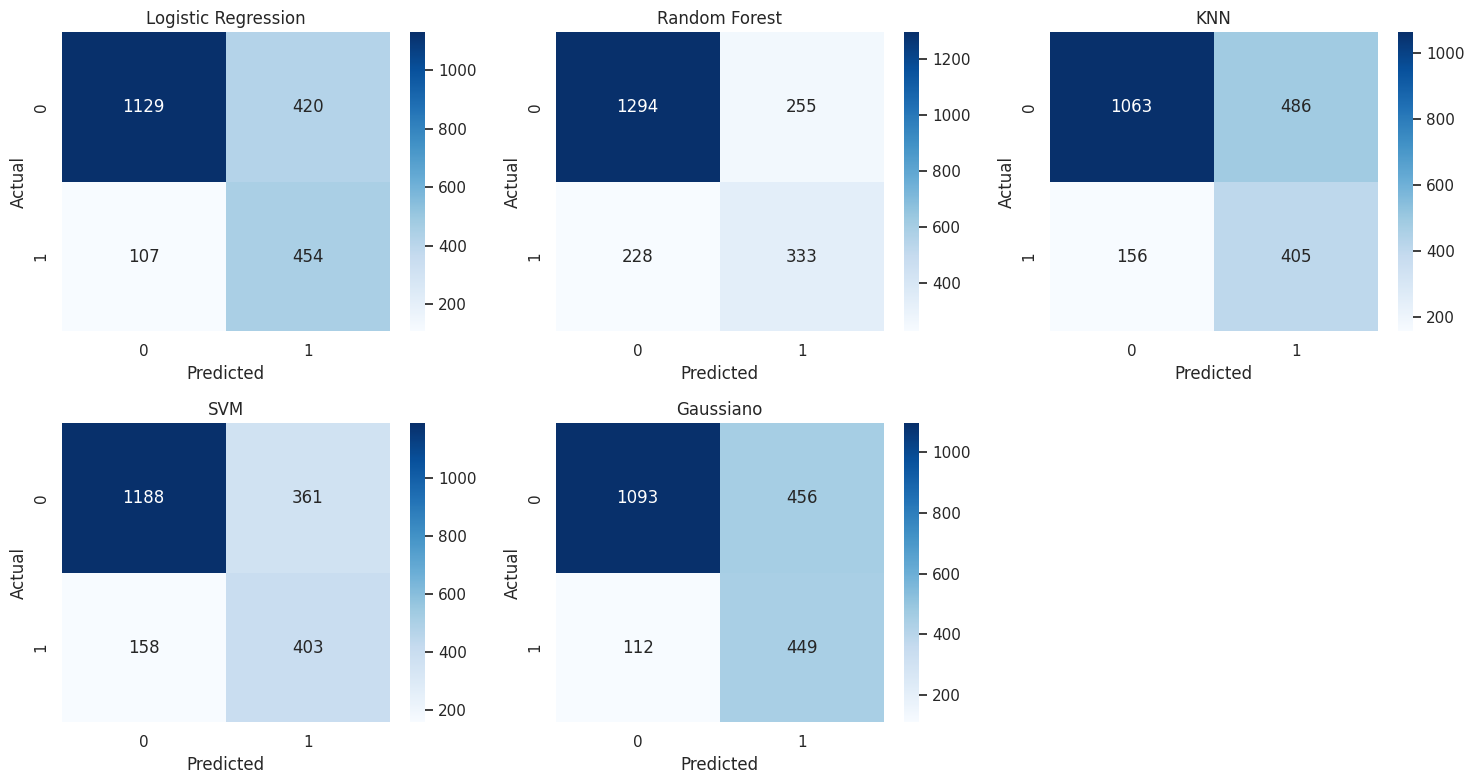

In [182]:
#comparar la matriz de confusion de los modelos en gráficas
sns.set(style="whitegrid")
plt.figure(figsize=(15, 8))
models = ['Logistic Regression', 'Random Forest', 'KNN', 'SVM', 'Gaussiano']
confusion_matrices = [confusion_matrix(y_test, y_pred_lr), confusion_matrix(y_test, y_pred_rf), confusion_matrix(y_test, y_pred_knn), confusion_matrix(y_test, y_pred_svm), confusion_matrix(y_test, y_pred_nb)]
for i, cm in enumerate(confusion_matrices):
    plt.subplot(2, 3, i+1)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(models[i])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
plt.tight_layout()
plt.show()

#Conclusión

los modelos con mejor desempeño para predecir la fuga de clientes (Churn) fueron el Naive Bayes Gaussiano y la Regresión Logística, ambos con un puntaje ROC AUC de 0.81. Esto sugiere que para este conjunto de datos en particular, un modelo lineal como la regresión logística y uno probabilístico como Naive Bayes son muy efectivos para distinguir entre los clientes que se irán y los que se quedarán. El modelo de Bosque Aleatorio también tuvo un buen desempeño general, mostrando un equilibrio razonable entre precisión y capacidad predictiva.

Se identificaron las siguientes variables como las más importantes para predecir la cancelación del servicio:
- Tipo de Contrato (account.Contract): Los clientes con contratos "Month-to-month" (mes a mes) tienen una alta probabilidad de churn. Esto sugiere que la falta de un compromiso a largo plazo facilita la decisión de irse.

- Antigüedad (customer.tenure): A menor antigüedad del cliente, mayor es la probabilidad de que se vaya. Los clientes nuevos son más propensos a cancelar el servicio.

- Servicio de Internet (internet.InternetService): El servicio de "Fiber optic" (fibra óptica) está fuertemente asociado con un alto churn. Esto puede indicar problemas de calidad, precio o servicio al cliente en esta categoría.

- Método de Pago (account.PaymentMethod): El uso de "Electronic check" (cheque electrónico) como método de pago está relacionado con una mayor tasa de cancelación.

Con base en estos hallazgos, TelecomX podría implementar las siguientes estrategias para reducir el churn:

- Fidelización de Clientes Nuevos: Ofrecer incentivos a los clientes con poca antigüedad y contratos de mes a mes para que consideren opciones a largo plazo.

- Mejora del Servicio de Fibra Óptica: Investigar las causas del alto churn en los clientes de fibra óptica. Podría ser necesario mejorar la velocidad, la fiabilidad o el soporte técnico de este servicio.

- Análisis de Pagos: Explorar por qué los clientes que usan el cheque electrónico son más propensos a irse. Quizás se pueda optimizar este proceso o incentivar otros métodos de pago más convenientes.

- Enfoque en los Segmentos de Riesgo: Utilizar modelos como Regresión Logística o el modelo Gaussiano para identificar proactivamente a los clientes con alta probabilidad de churn y ofrecerles atención personalizada o promociones exclusivas.

